# This is a project to perform Exploratory Data Analysis on Movies from renowned streaming platforms like Netflix, Amazon Prime Video, Hulu and Disney+. Also, based on a user input, movies will be recommended.

### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling
import warnings
import collections
warnings.filterwarnings("ignore")

In [2]:
dataset = pd.read_csv('MoviesOnStreamingPlatforms_updated.csv')

In [3]:
dataset.head()

,Unnamed: 0,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
0,0,1,Inception,2010,13+,8.8,87%,1,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,1,2,The Matrix,1999,18+,8.7,87%,1,0,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0
2,2,3,Avengers: Infinity War,2018,13+,8.5,84%,1,0,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0
3,3,4,Back to the Future,1985,7+,8.5,96%,1,0,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0
4,4,5,"The Good, the Bad and the Ugly",1966,18+,8.8,97%,1,0,1,0,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0


In [4]:
dataset.shape

(16744, 17)

In [5]:
dataset.columns

Index(['Unnamed: 0', 'ID', 'Title', 'Year', 'Age', 'IMDb', 'Rotten Tomatoes',
       'Netflix', 'Hulu', 'Prime Video', 'Disney+', 'Type', 'Directors',
       'Genres', 'Country', 'Language', 'Runtime'],
      dtype='object')

### Data Cleaning

#### To seperate genre column in dataset, and concatenate two dataframes


In [6]:
seperated_genres = dataset['Genres'].str.get_dummies(',')

dataset = pd.concat([dataset, seperated_genres], axis = 1, sort = False)

In [7]:
dataset.head()

,Unnamed: 0,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,...,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Talk-Show,Thriller,War,Western
0,0,1,Inception,2010,13+,8.8,87%,1,0,0,...,0,0,0,1,0,0,0,1,0,0
1,1,2,The Matrix,1999,18+,8.7,87%,1,0,0,...,0,0,0,1,0,0,0,0,0,0
2,2,3,Avengers: Infinity War,2018,13+,8.5,84%,1,0,0,...,0,0,0,1,0,0,0,0,0,0
3,3,4,Back to the Future,1985,7+,8.5,96%,1,0,0,...,0,0,0,1,0,0,0,0,0,0
4,4,5,"The Good, the Bad and the Ugly",1966,18+,8.8,97%,1,0,1,...,0,0,0,0,0,0,0,0,0,1


#### Seperating movies viewing platforms

In [8]:
netflix_movies = dataset.loc[dataset['Netflix'] == 1]
hulu_movies = dataset.loc[dataset['Hulu'] == 1]
prime_video_movies = dataset.loc[dataset['Prime Video'] == 1]
disney_movies = dataset.loc[dataset['Disney+'] == 1]

#### Dropping columns of other movies watching platforms and unnecessary columns

In [9]:
netflix_movies = netflix_movies.drop(['Hulu', 'Prime Video', 'Disney+', 'Type', 'Unnamed: 0','Genres'], axis = 1)
hulu_movies = hulu_movies.drop(['Netflix', 'Prime Video', 'Disney+', 'Type', 'Unnamed: 0','Genres'], axis = 1)
prime_video_movies = prime_video_movies.drop(['Hulu', 'Netflix', 'Disney+', 'Type', 'Unnamed: 0','Genres'], axis = 1)
disney_movies = disney_movies.drop(['Hulu', 'Prime Video', 'Netflix', 'Type', 'Unnamed: 0','Genres'], axis = 1)

In [10]:
disney_movies.head()

,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Disney+,Directors,Country,Language,...,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Talk-Show,Thriller,War,Western
95,96,Saving Mr. Banks,2013,13+,7.5,79%,1,John Lee Hancock,"United States,United Kingdom,Australia",English,...,0,0,0,0,0,0,0,0,0,0
103,104,Amy,2015,18+,7.8,95%,1,NaN,United States,English,...,0,0,0,0,0,0,0,0,0,0
122,123,Bolt,2008,7+,6.8,89%,1,"Byron Howard,Chris Williams",United States,English,...,0,0,0,0,0,0,0,0,0,0
125,126,The Princess and the Frog,2009,all,7.1,85%,1,"Ron Clements,John Musker",United States,"English,French",...,0,0,1,0,0,0,0,0,0,0
150,151,Miracle,2004,7+,7.5,81%,1,Gavin O'Connor,"Canada,United States",English,...,0,0,0,0,0,1,0,0,0,0


### Generating report

In [11]:
pandas_profiling.ProfileReport(dataset)

In [12]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16744 entries, 0 to 16743
Data columns (total 44 columns):
Unnamed_0          16744 non-null int64
ID                 16744 non-null int64
Title              16744 non-null object
Year               16744 non-null int64
Age                7354 non-null object
IMDb               16173 non-null float64
Rotten_Tomatoes    5158 non-null object
Netflix            16744 non-null int64
Hulu               16744 non-null int64
Prime_Video        16744 non-null int64
Disney+            16744 non-null int64
Type               16744 non-null int64
Directors          16018 non-null object
Genres             16469 non-null object
Country            16309 non-null object
Language           16145 non-null object
Runtime            16152 non-null float64
Action             16744 non-null int64
Adventure          16744 non-null int64
Animation          16744 non-null int64
Biography          16744 non-null int64
Comedy             16744 non-null int64
Cr

In [13]:
index_netflix = netflix_movies.index
total_netflix_movies = len(index_netflix)

index_hulu = hulu_movies.index
total_hulu_movies = len(index_hulu)

index_prime = prime_video_movies.index
total_prime_movies = len(index_prime)

index_disney = disney_movies.index
total_disney_movies = len(index_disney)

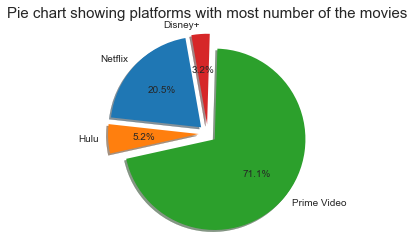

In [14]:
labels = 'Netflix' , 'Hulu', 'Prime Video', 'Disney+'
sizes = [total_netflix_movies,total_hulu_movies,total_prime_movies,total_disney_movies]
explode = (0.1, 0.1, 0.1, 0.1 )

fig1 , ax1 = plt.subplots()

ax1.pie(sizes,
        explode = explode,
        labels = labels,
        autopct = '%1.1f%%',
        shadow = True,
        startangle = 100)
plt.title("Pie chart showing platforms with most number of the movies", fontsize = 15)
ax1.axis('equal')
plt.show()

#### Converting Runtime unit from mins to hrs 

In [15]:
netflix_movies['time'] = netflix_movies['Runtime']
netflix_movies['screenplay'] = netflix_movies['time']/60

hulu_movies['time'] = hulu_movies['Runtime']
hulu_movies['screenplay'] = hulu_movies['time'] / 60

prime_video_movies['time'] = prime_video_movies['Runtime']
prime_video_movies['screenplay'] = prime_video_movies['time'] / 60

disney_movies['time'] = disney_movies['Runtime']
disney_movies['screenplay'] = disney_movies['time'] / 60

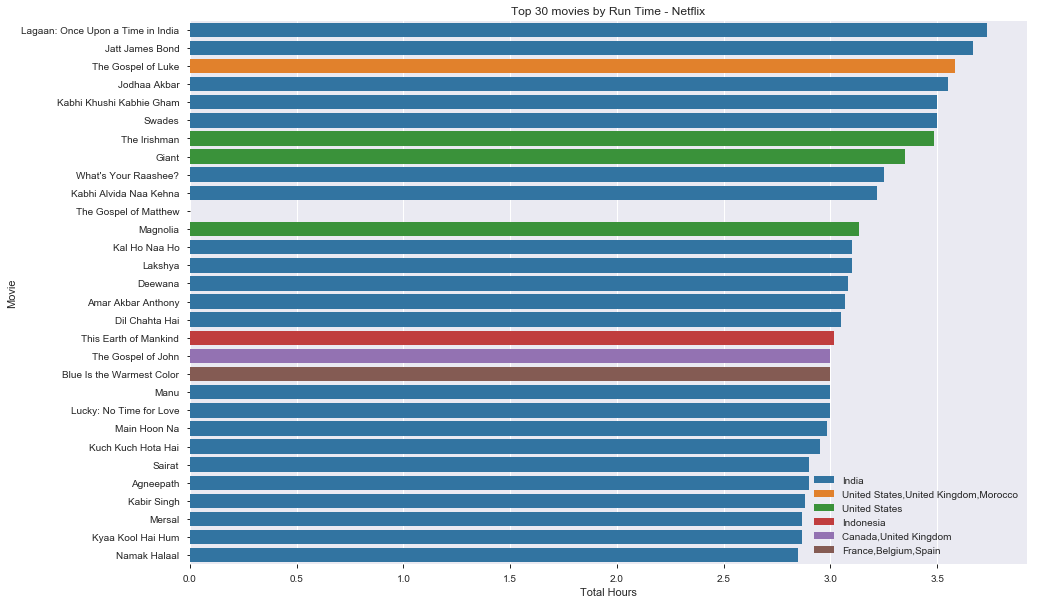

In [16]:
top_30_screenplay = netflix_movies.sort_values(by = 'screenplay', ascending = False).head(30)

plt.figure(figsize = (15, 10))
sns.barplot(data = top_30_screenplay, y = 'Title', x = 'screenplay', hue = 'Country', dodge = False)
plt.legend(loc = 'lower right')
plt.xlabel('Total Hours')
plt.ylabel('Movie')
plt.title('Top 30 movies by Run Time - Netflix')

plt.show()

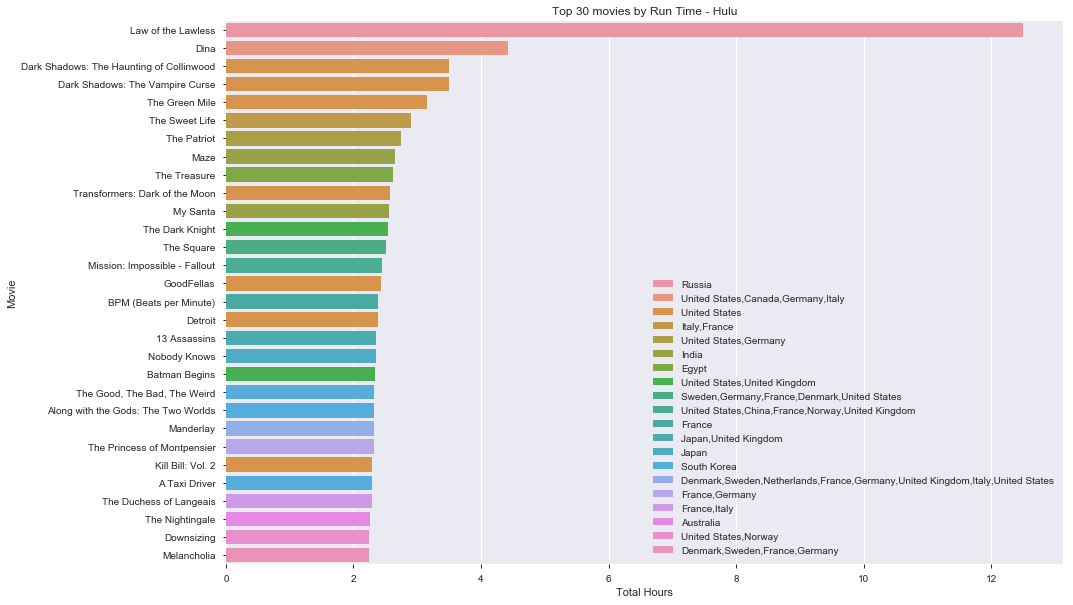

In [17]:
top_30_screenplay = hulu_movies.sort_values(by = 'screenplay', ascending = False).head(30)
plt.figure(figsize = (15, 10))
sns.barplot(data = top_30_screenplay, y = 'Title', x = 'screenplay', hue = 'Country', dodge = False)
plt.legend(loc = 'lower right')
plt.xlabel('Total Hours')
plt.ylabel('Movie')
plt.title('Top 30 movies by Run Time - Hulu')
plt.show()

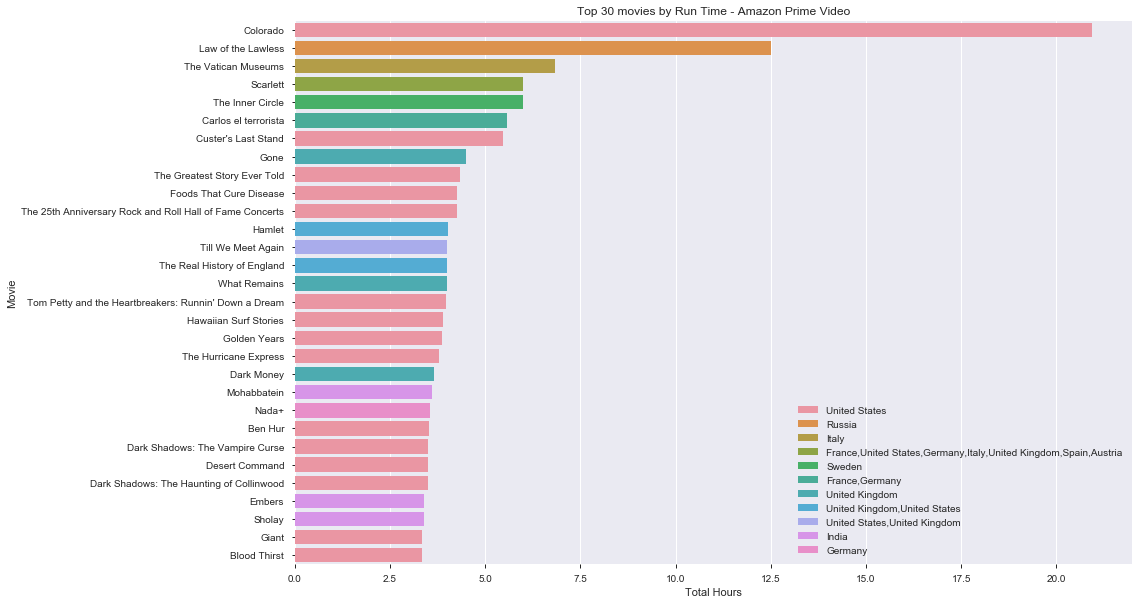

In [18]:
top_30_screenplay = prime_video_movies.sort_values(by = 'screenplay', ascending = False).head(30)

plt.figure(figsize = (15, 10))
sns.barplot(data = top_30_screenplay, y = 'Title', x = 'screenplay', hue = 'Country', dodge = False)
plt.legend(loc = 'lower right')
plt.xlabel('Total Hours')
plt.ylabel('Movie')
plt.title('Top 30 movies by Run Time - Amazon Prime Video')
plt.show()

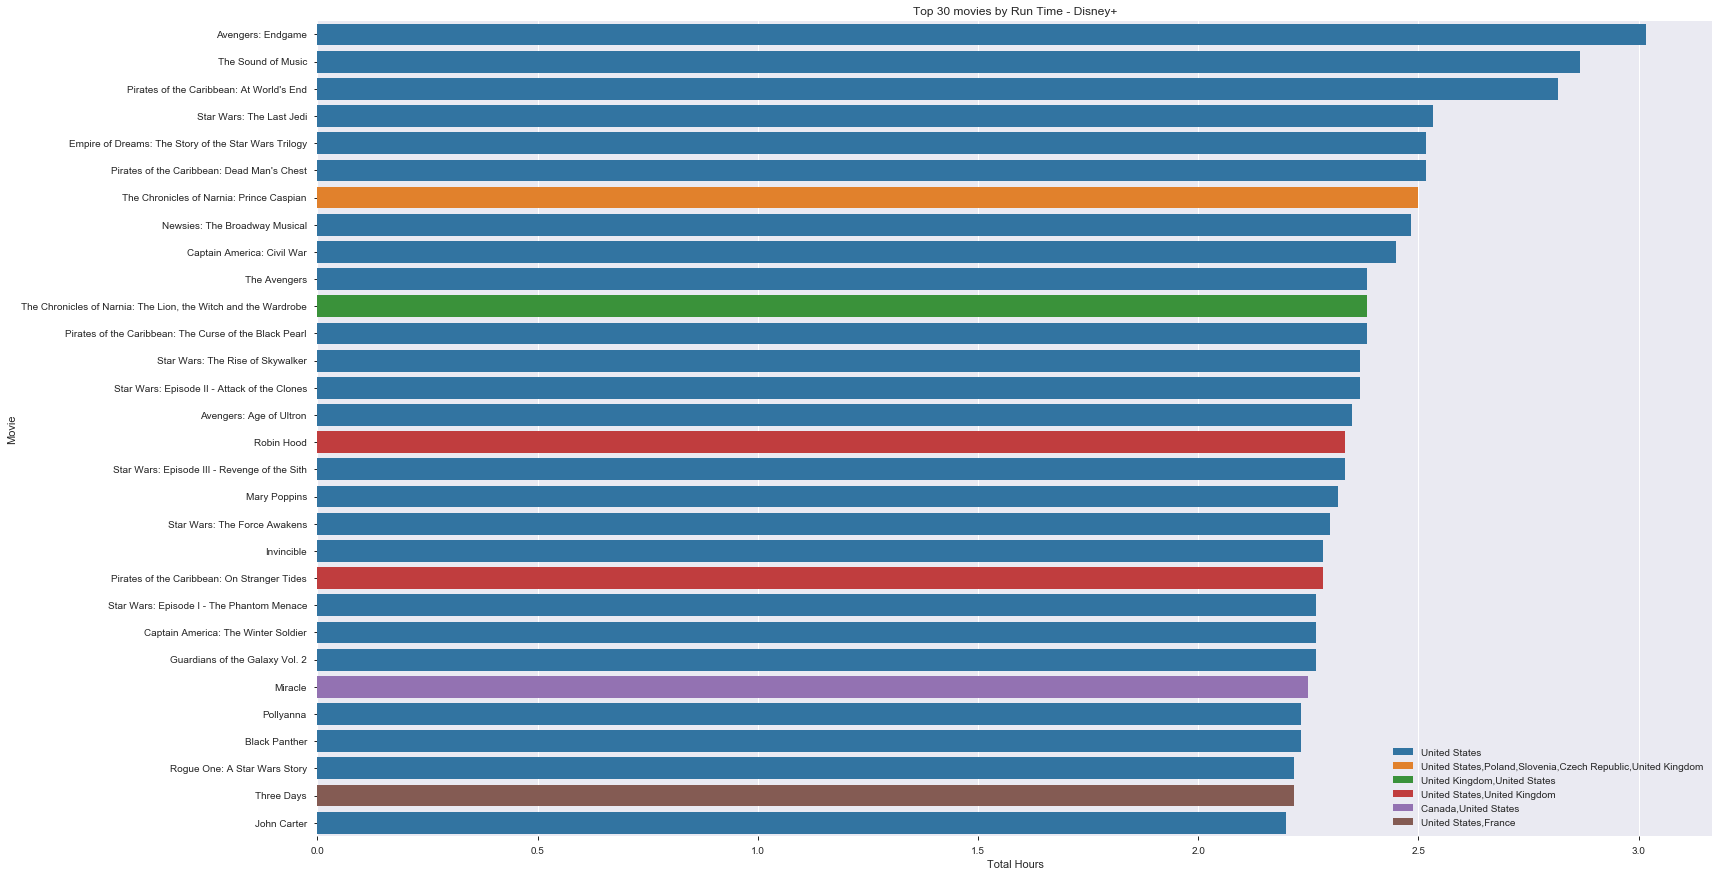

In [19]:
top_30_screenplay = disney_movies.sort_values(by = 'screenplay', ascending = False).head(30)

plt.figure(figsize = (25, 15))
sns.barplot(data = top_30_screenplay, y = 'Title', x = 'screenplay', hue = 'Country', dodge = False)
plt.legend(loc = 'lower right')
plt.xlabel('Total Hours')
plt.ylabel('Movie')
plt.title('Top 30 movies by Run Time - Disney+')
plt.show()

### Streaming platform with most movies above 8+ rating  according to IMDb.

In [20]:
rate_mov_net = netflix_movies['IMDb'] > 8
rate_mov_dis = disney_movies['IMDb'] > 8
rate_mov_pvm = prime_video_movies['IMDb'] > 8
rate_mov_hulu = hulu_movies['IMDb'] > 8

print("Total Movies on Netflix with more than 8+ rating(IMDb) :", rate_mov_net.sum())
print("Total Movies on Disney+ with more than 8+ rating(IMDb) :", rate_mov_dis.sum())
print("Total Movies on amazon prime video with more than 8+ rating(IMDb) :", rate_mov_pvm.sum())
print("Total Movies on Hulu with more than 8+ rating(IMDb) :", rate_mov_hulu.sum())

Total Movies on Netflix with more than 8+ rating(IMDb) : 129
Total Movies on Disney+ with more than 8+ rating(IMDb) : 21
Total Movies on amazon prime video with more than 8+ rating(IMDb) : 324
Total Movies on Hulu with more than 8+ rating(IMDb) : 23


In [21]:
top_rated = [rate_mov_net.sum(), rate_mov_dis.sum(), rate_mov_pvm.sum(), rate_mov_hulu.sum()]
top_plat = ['Netflix', 'Disney', 'Prime Video', 'Hulu']

In [22]:
top_rated_data = pd.DataFrame({
    'platforms' : top_plat,
    'total_mov' : top_rated
})

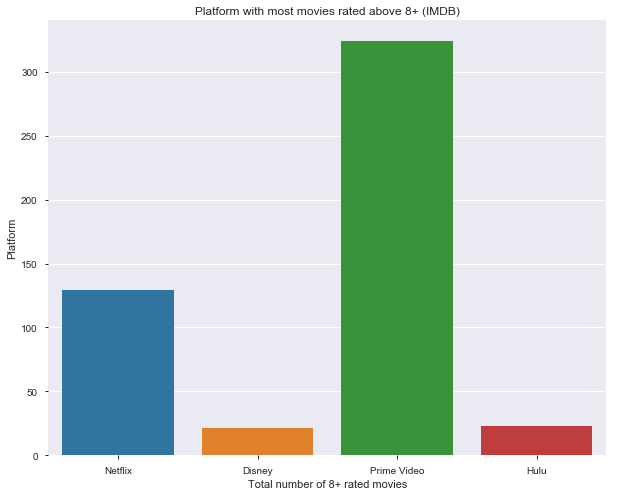

In [23]:
plt.figure(figsize = (10, 8))
sns.barplot(data = top_rated_data,
           x = top_rated_data['platforms'],
           y = top_rated_data['total_mov']
)
plt.ylabel('Platform')
plt.xlabel('Total number of 8+ rated movies')
plt.title('Platform with most movies rated above 8+ (IMDB)')
plt.show()

### Extracting Genres from the dataset

In [24]:
list_genre = dataset['Genres'].str.split(',',expand = True)

In [25]:
list_genre

,0,1,2,3,4,5,6,7,8
0,Action,Adventure,Sci-Fi,Thriller,None,None,None,None,None
1,Action,Sci-Fi,None,None,None,None,None,None,None
2,Action,Adventure,Sci-Fi,None,None,None,None,None,None
3,Adventure,Comedy,Sci-Fi,None,None,None,None,None,None
4,Western,None,None,None,None,None,None,None,None
5,Animation,Action,Adventure,Family,Sci-Fi,None,None,None,None
6,Biography,Drama,Music,War,None,None,None,None,None
7,Drama,Western,None,None,None,None,None,None,None
8,Action,Adventure,None,None,None,None,None,None,None
9,Adventure,Drama,War,None,None,None,None,None,None


In [26]:
# converting all elements of dataframe into Strings
list_genre = list_genre.applymap(str)

In [27]:
genres = []
for i in range(0, list_genre.shape[1]):
    list_genre[i]
    for j in range(0, list_genre.shape[0]) :
        if (list_genre[i][j] not in genres) and list_genre[i][j] != 'None' and list_genre[i][j] != 'nan':
            genres.append(list_genre[i][j])
        else:
            pass  
genres

['Action',
 'Adventure',
 'Western',
 'Animation',
 'Biography',
 'Drama',
 'Crime',
 'Comedy',
 'Documentary',
 'Family',
 'Horror',
 'Thriller',
 'Mystery',
 'Fantasy',
 'Romance',
 'Short',
 'Sci-Fi',
 'Talk-Show',
 'Sport',
 'Reality-TV',
 'Musical',
 'Music',
 'War',
 'News',
 'History',
 'Game-Show',
 'Film-Noir']

### Displaying the top N rated movies based on favourite genre and respective platforms.

In [28]:
def top_rated(genre, platform, n_top):
    genre = platform.loc[platform[genre] == 1]

    top_50 = genre.sort_values(by = 'IMDb', ascending = False).head(n_top)

    plt.figure(figsize = (15, 10))
    sns.barplot(data = top_50, y = 'Title', x = 'IMDb', dodge = False)
    plt.legend(loc = 'lower right')
    plt.xlabel('Ratings', FontSize = 25)
    plt.ylabel('Movies', FontSize = 25)
    plt.title('Top 50 movies by your fav genres',)
    plt.show()

#### Couple of samples

No handles with labels found to put in legend.


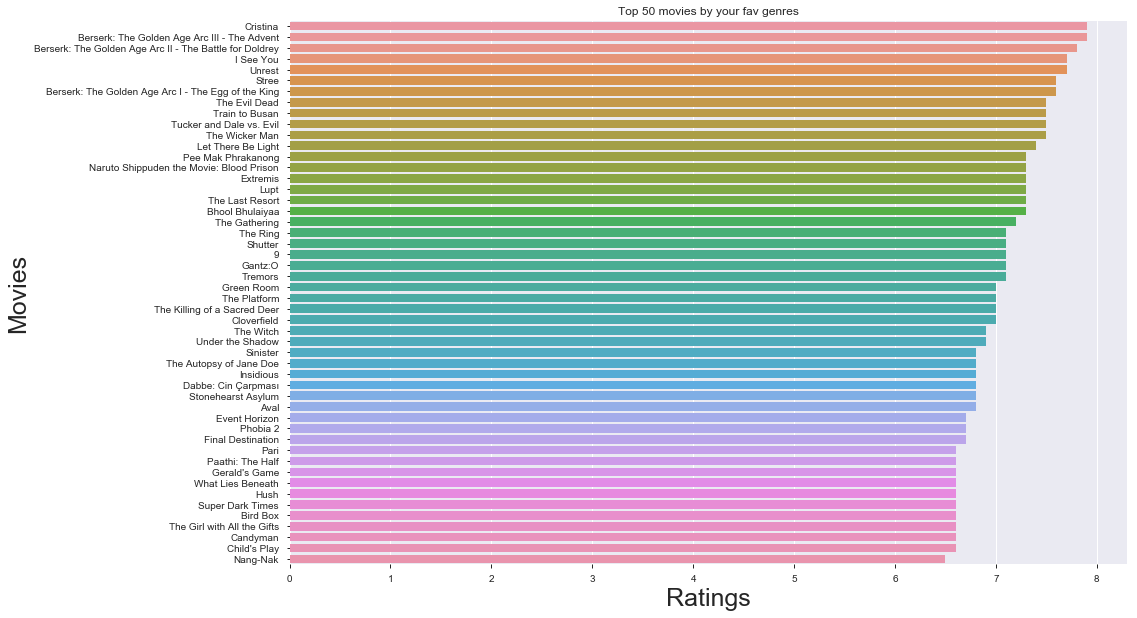

In [29]:
top_rated ('Horror', netflix_movies, 50)

No handles with labels found to put in legend.


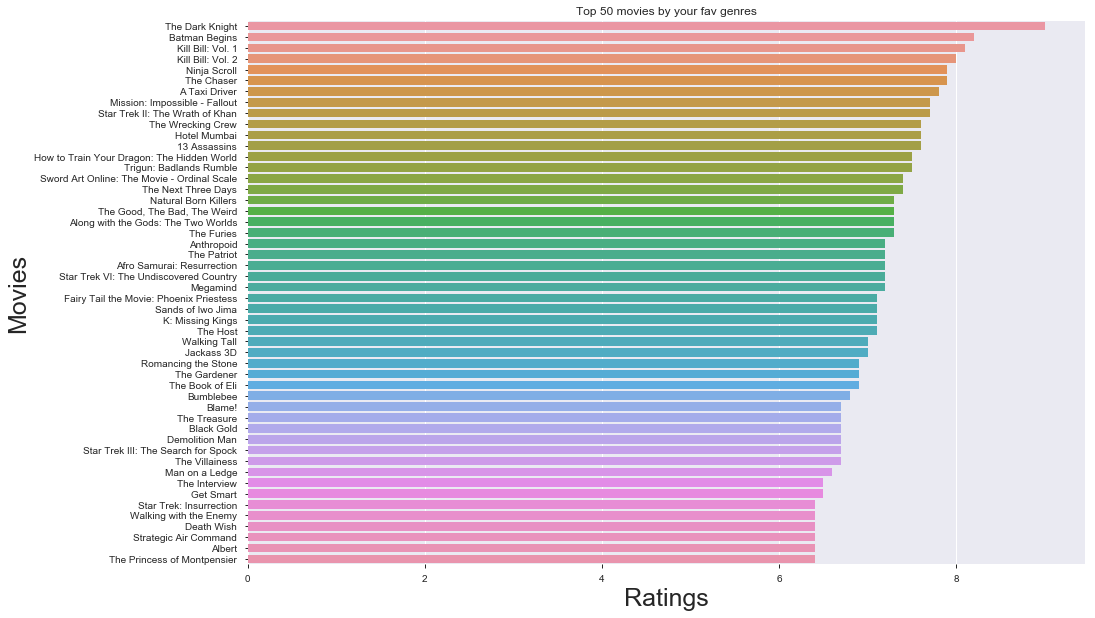

In [30]:
top_rated ('Action', hulu_movies, 50)

# Creating Reccomendation system only for movies and tv_shows available on Netflix. Can be replicated for other platforms using available CSV - datasets_674388_1186156_tv_shows.csv

In [31]:
df = pd.read_csv('netflix_titles.csv')

In [32]:
df.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


In [33]:
data = df[['title','director','cast','listed_in','description']]
data.head(3)

,title,director,cast,listed_in,description
0,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,Jandino: Whatever it Takes,NaN,Jandino Asporaat,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",Kids' TV,"With the help of three human allies, the Autob..."


#### Importing required libraries
RAKE short for Rapid Automatic Keyword Extraction algorithm, is a domain independent keyword extraction algorithm which tries to determine key phrases in a body of text by analyzing the frequency of word appearance and its co-occurance with other words in the text.

In [34]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer
from rake_nltk import Rake

In [35]:
rake = Rake()

In [36]:
data['director'] = data['director'].fillna(' ')
data['director'] = data['director'].astype(str)
data['cast'] = data['cast'].fillna(' ')
data['cast'] = data['cast'].astype(str)

In [37]:
data['key_notes'] = ''
for index, row in data.iterrows():
    plot = row['description']
    
    rake.extract_keywords_from_text(plot)
    keyword_score = rake.get_word_degrees()
    
    genre = ''.join(row['listed_in'].split(',')).lower()
    director = ''.join(row['director'].replace(' ','').split(',')).lower()
    cast = ' '.join(row['cast'].replace(' ','').split(',')).lower()
    keyword_score = ' '.join(list(keyword_score.keys()))
    
    row['key_notes'] = genre + ' ' + ' ' + director + ' ' + cast + ' ' + keyword_score

recommend = data[['title','key_notes']]
recommend.head()

,title,key_notes
0,Norm of the North: King Sized Adventure,children & family movies comedies richardfinn...
1,Jandino: Whatever it Takes,stand-up comedy jandinoasporaat challenges r...
2,Transformers Prime,kids' tv petercullen sumaleemontano frankwel...
3,Transformers: Robots in Disguise,kids' tv willfriedle darrencriss constancezi...
4,#realityhigh,comedies fernandolebrija nestacooper katewals...


In [38]:
cv = CountVectorizer() # Convert a collection of text documents to a matrix of token counts
count_mat = cv.fit_transform(recommend['key_notes'])
cosine_sim = cosine_similarity(count_mat,count_mat) 
print(cosine_sim)

[[1.         0.         0.         ... 0.0942809  0.03086067 0.03390318]
 [0.         1.         0.04472136 ... 0.         0.         0.        ]
 [0.         0.04472136 1.         ... 0.         0.10141851 0.07427814]
 ...
 [0.0942809  0.         0.         ... 1.         0.         0.        ]
 [0.03086067 0.         0.10141851 ... 0.         1.         0.21971769]
 [0.03390318 0.         0.07427814 ... 0.         0.21971769 1.        ]]


#### Information about Cosine Similarity here: 
http://blog.christianperone.com/2013/09/machine-learning-cosine-similarity-for-vector-space-models-part-iii/

### Recommending 5 movies based on the highest cosine similarity score to the one input from user. 

In [39]:
indices = pd.Series(recommend['title'])
def recommend_movie(name):
    movie=[]
    idx = indices[indices == name].index[0]
    sort_index = pd.Series(cosine_sim[idx]).sort_values(ascending = False)
    recommendation_5 = sort_index.iloc[1:5]
    for i in recommendation_5.index:
        movie.append(indices[i])
    return movie

In [40]:
def rec():
    try:
        i = 1
        while(i > 0):
            name = input("Enter The Name of a Movie or Tv Show: ")
            if name.lower() == 'quit':
                break
            else:
                print(recommend_movie(name))

    except KeyboardInterrupt:
        print("The movie or Tv Show does not exist\n")
        rec()

    except IndexError:
        print("The movie or Tv Show does not exist\n")
        rec()
        

print("To exit Enter \"quit\" \n")
rec()

To exit Enter "quit" 

Enter The Name of a Movie or Tv Show: Pulp Fiction
['The Evil Dead', 'III Smoking Barrels', 'Carrie', 'Tales From the Hood 2']
Enter The Name of a Movie or Tv Show: quit


# FIN!